<div style="border-radius: 10px; border: #DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size: 100%; text-align: left">
<h3 align="left"><font color='#3498DB'>MCMC </font></h3>
    
    MCMCの計算を行うコードを実行しています。
    Persuasive Python by Adam Fleischhacker 
    https://www.persuasivepython.com/
    
    のコードをライセンスに従って使用しています。
  

/tmp/ipykernel_42/3085080301.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


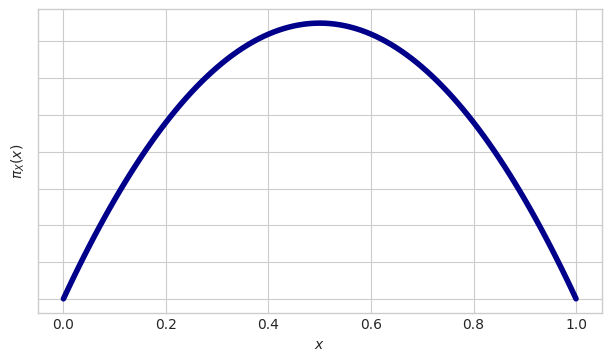

In [1]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

def pi_X(x):
    if x >= 0 and x <= 1:
        return 6*x*(1-x)
    
    else:
        return 0

x = [i/100 for i in range(101)]
y = [pi_X(i) for i in x]

fig, ax = plt.subplots(figsize=(6, 3.5), layout='constrained')
ax.plot(x, y, color='darkblue', linewidth=4)
ax.set(xlabel=r'$x$', ylabel=r'$\pi_X(x)$')
ax.set_yticklabels([])

plt.show();

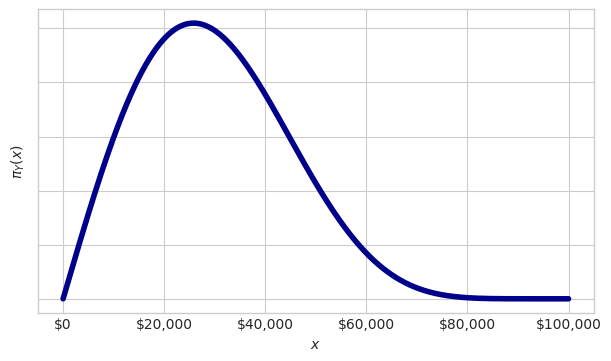

In [2]:
from matplotlib.ticker import FuncFormatter

def pi_Y(y):
    kumaRealization = y / 100000
    jacobian = 1 / 10**5
    if kumaRealization >= 0 and kumaRealization <= 1:
        return 2*8*kumaRealization*(1-kumaRealization**2)**7*jacobian
    else:
        return 0
    
def dollar_format(x, pos):
    """Format y-axis tick Labels in dollar format"""
    return '${:,.0f}'.format(x)

x = [i for i in range(100001)]
y = [pi_Y(i) for i in x]

fig, ax = plt.subplots(figsize=(6, 3.5), layout='constrained')
ax.plot(x, y, color='darkblue', linewidth=4)
ax.set(xlabel=r'$x$', ylabel=r'$\pi_Y(x)$')
ax.xaxis.set_major_formatter(FuncFormatter(dollar_format))
ax.set_yticklabels([])

plt.show()

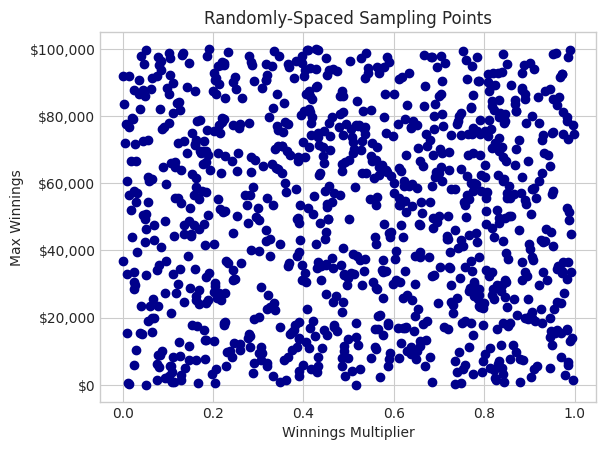

In [3]:
import pandas as pd
import numpy as np

N = 1000 ## 1000でのサンプル

gridDF = pd.DataFrame({'winningsMultiplier': np.random.rand(N),
                       'maxWinnings': 10**5*np.random.rand(N)})

fig, ax = plt.subplots()
ax.scatter(gridDF['winningsMultiplier'], gridDF['maxWinnings'], color='darkblue')
ax.yaxis.set_major_formatter(FuncFormatter(dollar_format))

# 軸ラベルとタイトルを設定
ax.set_xlabel('Winnings Multiplier')
ax.set_ylabel('Max Winnings')
ax.set_title('Randomly-Spaced Sampling Points')

plt.show()

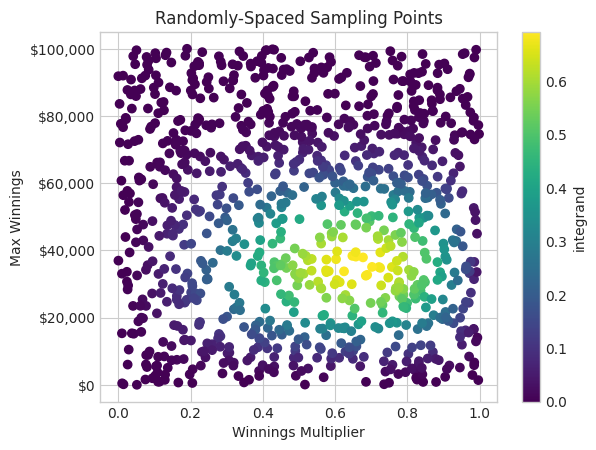

In [4]:
# 積分関数を定義する
def integrandFun(x, y):
    return 3*x**2*y**2 / (3125*10**5)*(1-x)*(1-y**2/10**10)**7

# 上の関数を使ってデータフレームに列を追加する
gridDF['integrand'] = gridDF.apply(lambda row: integrandFun(row['winningsMultiplier'], row['maxWinnings']), axis=1)

fig, ax = plt.subplots()
winPlot = ax.scatter(gridDF['winningsMultiplier'], gridDF['maxWinnings'], c=gridDF['integrand'], cmap='viridis')
ax.yaxis.set_major_formatter(FuncFormatter(dollar_format))

# ラベルとタイトルを設定する
ax.set_xlabel('Winnings Multiplier')
ax.set_ylabel('Max Winnings')
ax.set_title('Randomly-Spaced Sampling Points')

fig.colorbar(winPlot, label='integrand')

plt.show()

In [5]:
expectedWinnings = 10**5 * np.mean(gridDF['integrand'])
print("Expected Winnings: " + dollar_format(expectedWinnings, None))

Expected Winnings: $14,889


In [6]:
gridDF.sample(n=10)

,winningsMultiplier,maxWinnings,integrand
370,0.392706,43062.828320,0.396707
966,0.616099,63692.143184,0.148649
309,0.704841,86538.240990,0.000664
377,0.405115,12612.582157,0.133266
947,0.177852,69699.875384,0.011526
614,0.896941,66518.540538,0.058971
719,0.689929,76269.715176,0.018468
185,0.904869,38183.824837,0.361775
397,0.249398,91533.346383,0.000011
888,0.801551,61699.579672,0.162830


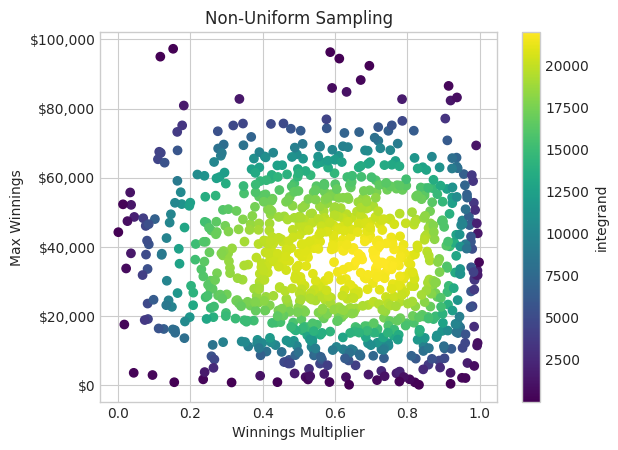

In [7]:
from scipy.stats import truncnorm

## 分布のバウンドは、実際のバウンドではなくsdの範囲内にある

xSamplingDist = truncnorm((0 - 0.65) / 0.3, (1-0.65)/0.3, loc=0.65, scale=0.3) # winnings winningsMultiplier
ySamplingDist = truncnorm((0 - 35000) / 20000, (100000 - 35000) / 20000, loc=35000.0, scale=20000.0) # maxWinnings

# 分布からのサンプル
np.random.seed(123)
n = 1000 
winningsMultiplier = xSamplingDist.rvs(n)
maxWinnings = ySamplingDist.rvs(n)

integrand = integrandFun(winningsMultiplier, maxWinnings) / (xSamplingDist.pdf(winningsMultiplier) * ySamplingDist.pdf(maxWinnings))

# 散布図の作成
fig, ax = plt.subplots()
winPlot = ax.scatter(winningsMultiplier, maxWinnings, c=integrand, cmap='viridis')

# 軸ラベルとタイトルを設定
ax.yaxis.set_major_formatter(FuncFormatter(dollar_format))
ax.set_xlabel('Winnings Multiplier')
ax.set_ylabel('Max Winnings')
ax.set_title('Non-Uniform Sampling')

fig.colorbar(winPlot, label='integrand')
plt.show()